# Accessing 1D slices

Some boilerplate code

In [1]:
import numpy as np
from postcactus.simdir import SimDir
%matplotlib inline
import matplotlib.pyplot as plt

For working with grid data, we need another module

In [2]:
from postcactus import grid_data as gd

Get object representing simulation data

In [3]:
example_data = "./bns_example"
sd = SimDir(example_data)

1D grid data accessed via sd.grid.x. This uses 1D datasets if available, or performs 1D cuts is only 2D or 3D data is available. It reads either hdf5 (preferred) or text based formats. Those decisions are automatic, transparent to the user.

In [4]:
print sd.grid.x


Available grid data of dimension (0,) (including cuts): 
['rho', 'hmns_moments', 'merger_xy_v2', 'merger_xy_t7_9', 'polar_coords', 'merger_xy_t13_15', 'merger_xy_disk', 'merger_xy_v3']



Note this picked up some non-Cactus hdf5 files contaminating the simulation folder. Place foreign files in folders named `temp`, `movie`, or `report` to ignore them.

Getting available iterations for density:

In [5]:
its = sd.grid.x.get_iters('rho')
print len(its), its[-1]

819 209408


In [6]:
it  = 0
rho = sd.grid.x.read('rho', it)

Above we loaded a raw grid hirachy. For 1D slices, there is a special method for converting to a single irregular spaced 1D grid

In [7]:
x,rho_x = gd.merge_comp_data_1d(rho)

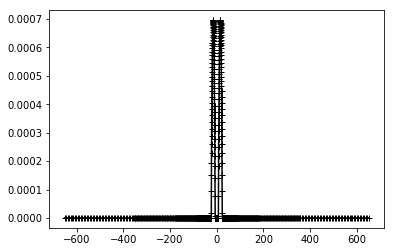

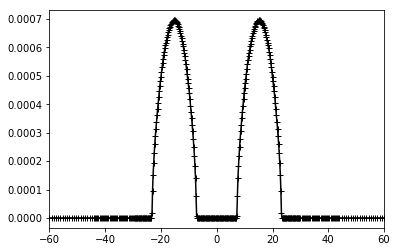

In [8]:
plt.plot(x, rho_x, 'k-+')
plt.figure()
plt.plot(x, rho_x, 'k-+')
plt.xlim(-60,60);

Alternatively, we can also interpolate to regular grid while loading, as shown below.

In [9]:
it = 0
n_points = 400
x0 = -60.0
x1 = 60.0
g = gd.RegGeom([n_points], [x0], x1=[x1])

srho = sd.grid.x.read('rho', it, geom=g, order=2)
sx, = srho.coords1d()

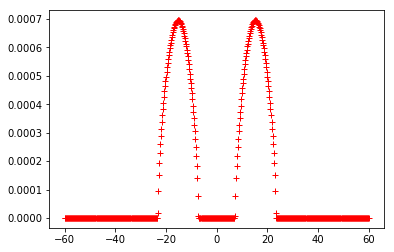

In [10]:
plt.plot(sx, srho.data, 'r+');